### Setup

In [1]:
# install if not yet done
using Pkg

# Pkg.add(url="https://github.com/mppmu/BoostFractor.jl.git")
# Pkg.add(url="https://github.com/bergermann/Dragoon.jl.git")
Pkg.update()

    Updating registry at `C:\Users\bergermann\.julia\registries\General.toml`
    Updating git-repo `https://git.rwth-aachen.de/nick1/KeyVNA-jl.git`
    Updating git-repo `https://git.rwth-aachen.de/nick1/XIMC-jl.git`
    Updating git-repo `https://github.com/mppmu/BoostFractor.jl.git`
    Updating git-repo `https://github.com/bergermann/Dragoon.jl.git`
   Installed OffsetArrays ───────── v1.17.0
   Installed Libmount_jll ───────── v2.41.0+0
   Installed Git_jll ────────────── v2.49.0+0
   Installed GR_jll ─────────────── v0.73.14+0
   Installed Xorg_xkbcomp_jll ───── v1.4.7+0
   Installed Roots ──────────────── v2.2.7
   Installed HTTP ───────────────── v1.10.16
   Installed Xorg_libSM_jll ─────── v1.2.6+0
   Installed Cairo_jll ──────────── v1.18.4+0
   Installed Fontconfig_jll ─────── v2.16.0+0
   Installed Xorg_libxkbfile_jll ── v1.1.3+0
   Installed Xorg_libXinerama_jll ─ v1.1.6+0
   Installed Xorg_libXau_jll ────── v1.0.13+0
   Installed JLD2 ───────────────── v0.5.13
   Installe

In [2]:
using Dragoon
using Plots

In [27]:
n = 4 # number of discs in the booster
f0 = 25.025e9
eps = 9.0
τ = 2e-3

initdist = findpeak1d(f0,n; granularity=10_000,deviation=0.5,thickness=τ,eps=eps) # initial disc configuration

freqs = genFreqs(f0,50e6; n=10) # optimize on these frequencies
freqsplot = genFreqs(f0,150e6; n=1000) # plot with these frequencies

booster = AnalyticalBooster(initdist; ndisk=n,ϵ=eps,τ=τ)  # physical properties of the booster
booster.wavelength = λ(f0)

hist = initHist(booster,1000,freqs,ObjAnalytical); # stores measurements
#                           ^ length, should be at least n

1000-element Vector{State}:
 State([0.006014719702837417, 0.013029439405674834, 0.020044159108512254, 0.027058878811349666], -28.53674013757645, Dates.DateTime("0000-01-01T00:00:00"))
 State([0.0, 0.0, 0.0, 0.0], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 State([0.0, 0.0, 0.0, 0.0], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 State([0.0, 0.0, 0.0, 0.0], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 State([0.0, 0.0, 0.0, 0.0], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 State([0.0, 0.0, 0.0, 0.0], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 State([0.0, 0.0, 0.0, 0.0], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 State([0.0, 0.0, 0.0, 0.0], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 State([0.0, 0.0, 0.0, 0.0], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 State([0.0, 0.0, 0.0, 0.0], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 ⋮
 State([0.0, 0.0, 0.0, 0.0], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 State([0.0, 0.0, 0.0, 0.0], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 State([0.

In [25]:
initdist

0.006014719702837417

In [28]:
booster.pos

4-element Vector{Float64}:
 0.006014719702837417
 0.013029439405674834
 0.020044159108512254
 0.027058878811349666

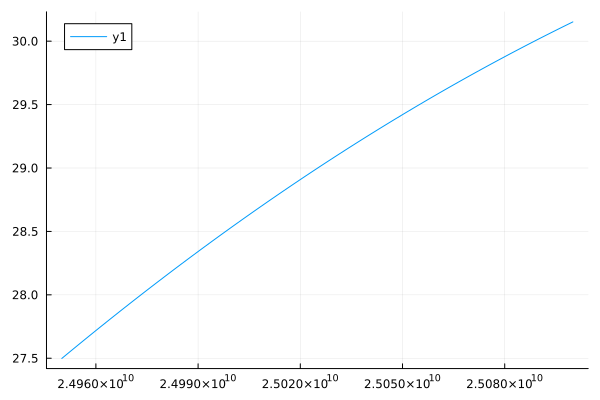

In [26]:
plot(freqsplot,getBoost1d(booster,freqsplot))

### Optimizer

In [8]:
trace = nelderMead(booster,hist,freqs,
                    1.,1+2/n,0.75-1/2n,1-1/n,1e-9,1e-9,
                    ObjAnalytical,
                    InitSimplexRegular(1e-4),
                    DefaultSimplexSampler,
                    UnstuckDont;
                    maxiter=Int(1e5),
                    showtrace=true,
                    showevery=100,
                    unstuckisiter=true,)

Iter: 100, timestamp: 8 minutes, 20 seconds
Iter finished. Objective value: -65.803

7.251327308721512e-5
2.791930678120633e-5
Iter: 200, timestamp: 8 minutes, 33 seconds
Iter finished. Objective value: -65.805

1.1717030041739747e-7
4.160427990799355e-8
Minimum simplex size reached.
No unstucking tried. Terminating.
Terminated. 266 Iterations.
Final objective value: -65.805
Elapsed movement time:  8 minutes, 33 seconds
Summed distance:   0.115
Elapsed computing time: 1 second, 188 milliseconds


267-element Vector{Dragoon.NMTrace}:
 Dragoon.NMTrace([0.00608759173973974 0.00608759173973974 … 0.00603759173973974 0.0061375917397397395; 0.01317518347947948 0.01317518347947948 … 0.013146315966019999 0.013146315966019999; 0.020262775219219223 0.020324012462788803 … 0.02024236280469603 0.02024236280469603; 0.027413612512162327 0.027334555570658118 … 0.027334555570658118 0.027334555570658118], [-34.62817605433375, -34.30824069236265, -33.879954090555096, -33.51685812222174, -33.47282991403004], [0.00607509173973974, 0.013182400357844352, 0.02026787832285002, 0.02735431980603417], -34.088339771729395, Dates.DateTime("0000-01-01T00:00:05.471"), 0.0009355907234194797)
 Dragoon.NMTrace([0.00608759173973974 0.006012591739739741 … 0.00608759173973974 0.00603759173973974; 0.01317518347947948 0.013218484749668701 … 0.013232918506398444 0.013146315966019999; 0.020262775219219223 0.020293393841004013 … 0.02024236280469603 0.02024236280469603; 0.027413612512162327 0.02737408404141022 … 0.0273345

In [ ]:
# obtain result, booster is now in optimized position
pos2dist(booster.pos)     #in distance space
# booster.pos               #in position space

In [ ]:
typeof(trace)

In [ ]:
# get handy output
plt = analyse(booster,hist,trace,freqsplot; freqs=freqs,div=10,ylim=[0,100e3])

# savefig(plt[i],"cool_epic_result_wow.svg")

In [ ]:
booster.timestamp

In [ ]:
analyse()